<a href="https://colab.research.google.com/github/aminsamir45/MIT-9.53---Emergent-Computation-within-Distributed-Neural-Circuits/blob/main/PSET%201/953_pset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

9.53 PSET 1

Samir Amin

In [ ]:
# First import libraries needed to solve the problem
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import stats
import math
import pandas as pd
import random
from sklearn.linear_model import Perceptron

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem 1: 

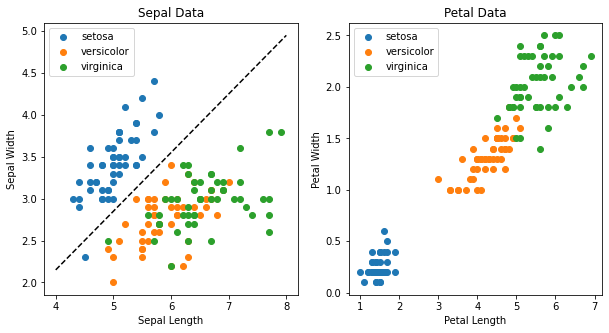

In [ ]:
#1.1 

iris_data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/9.53/PSET 1/Iris.txt', delimiter=',', usecols=(0, 1, 2, 3))
setosa = iris_data[:50]
versicolor = iris_data[50:100]
virginica = iris_data[100:150]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# sepal length vs width
axs[0].scatter(setosa[:, 0], setosa[:, 1], label='setosa')
axs[0].scatter(versicolor[:, 0], versicolor[:, 1], label='versicolor')
axs[0].scatter(virginica[:, 0], virginica[:, 1], label='virginica')
x = np.linspace(4, 8, 100)
y = 0.7 * x -0.65
axs[0].plot(x, y, linestyle='--', color='k')
axs[0].set_xlabel('Sepal Length')
axs[0].set_ylabel('Sepal Width')
axs[0].set_title("Sepal Data")
axs[0].legend()

# petal length vs width
axs[1].scatter(setosa[:, 2], setosa[:, 3], label='setosa')
axs[1].scatter(versicolor[:, 2], versicolor[:, 3], label='versicolor')
axs[1].scatter(virginica[:, 2], virginica[:, 3], label='virginica')
axs[1].set_xlabel('Petal Length')
axs[1].set_ylabel('Petal Width')
axs[1].set_title("Petal Data")
axs[1].legend()
plt.show()

In [ ]:
1.2 

def perceptron(X, y, lr=0.1, epochs=1000):

    # initialize weights to zero and errors
    w = np.zeros(X.shape[1])
    errors = []
    iters = 0

    # Iterate until convergence or max number of iterations
    for t in range(epochs):
        error_count = 0
        converged = False
        # Iterate over all input-output pairs
        for i in range(X.shape[0]):
            iters += 1
            # If max iter reached without convergence
            if iters > epochs:
                return None, errors, None

            # computing prediction
            y_pred = np.sign(np.dot(X[i], w))

            # update weight if prediction is incorrect
            if y_pred != y[i]:
                w += lr * y[i] * X[i]
                error_count += 1

        # check convergence if error = 0
        if error_count == 0:
            break

        #classification error
        error = error_count / X.shape[0]
        errors.append(error)

            
    return w, errors, iters    #weight, error, iterations

[ 0.13  0.41 -0.52 -0.22] [0.013333333333333334, 0.013333333333333334, 0.006666666666666667] 600
Accuracy: 100.00%


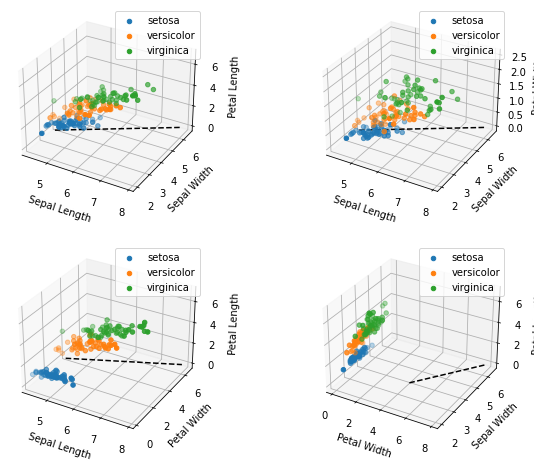

In [ ]:
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = np.array([min(X[:,0]), max(X[:,0])])
    m = -theta[1]/theta[2]
    # print(x1, m)
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
  
    # Create a figure with 4 subplots
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')

    ax1.scatter(setosa[:, 0], setosa[:, 1], setosa[:, 2], label='setosa')
    ax1.scatter(versicolor[:, 0], versicolor[:, 1], versicolor[:, 2], label='versicolor')
    ax1.scatter(virginica[:, 0], virginica[:, 1], virginica[:, 2], label='virginica')
    x = np.linspace(4, 8, 100)
    ax1.plot(x1, x2, linestyle='--', color='k')
    ax1.set_xlabel('Sepal Length')
    ax1.set_ylabel('Sepal Width')
    ax1.set_zlabel('Petal Length')
    ax1.legend()

    ax2.scatter(setosa[:, 0], setosa[:, 1], setosa[:, 3], label='setosa')
    ax2.scatter(versicolor[:, 0], versicolor[:, 1], versicolor[:, 3], label='versicolor')
    ax2.scatter(virginica[:, 0], virginica[:, 1], virginica[:, 3], label='virginica')
    x = np.linspace(4, 8, 100)
    ax2.plot(x1, x2, linestyle='--', color='k')
    ax2.set_xlabel('Sepal Length')
    ax2.set_ylabel('Sepal Width')
    ax2.set_zlabel('Petal Width')
    ax2.legend()

    ax3.scatter(setosa[:, 0], setosa[:, 3], setosa[:, 2], label='setosa')
    ax3.scatter(versicolor[:, 0], versicolor[:, 3], versicolor[:, 2], label='versicolor')
    ax3.scatter(virginica[:, 0], virginica[:, 3], virginica[:, 2], label='virginica')
    x = np.linspace(4, 8, 100)
    ax3.plot(x1, x2, linestyle='--', color='k')
    ax3.set_xlabel('Sepal Length')
    ax3.set_ylabel('Petal Width')
    ax3.set_zlabel('Petal Length')
    ax3.legend()

    ax4.scatter(setosa[:, 3], setosa[:, 1], setosa[:, 2], label='setosa')
    ax4.scatter(versicolor[:, 3], versicolor[:, 1], versicolor[:, 2], label='versicolor')
    ax4.scatter(virginica[:, 3], virginica[:, 1], virginica[:, 2], label='virginica')
    x = np.linspace(4, 8, 100)
    ax4.plot(x1, x2, linestyle='--', color='k')
    ax4.set_xlabel('Petal Width')
    ax4.set_ylabel('Sepal Width')
    ax4.set_zlabel('Petal Length')
    ax4.legend()


# load the Iris dataset
iris_data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/9.53/PSET 1/Iris.txt', delimiter=',', usecols=(0, 1, 2, 3))
y = [1] * 50 + [-1] * 100
x = iris_data

#train
w, errors, iters = perceptron(x, y, lr=0.1, epochs=1000)

# classify
classifications = np.sign(np.dot(x, w))

# print accuracy
correct_classifications = np.sum(classifications == y)
accuracy = correct_classifications / len(y) * 100
print(f"Accuracy: {accuracy:.2f}%")


plot_decision_boundary(x, w)

In [ ]:
#1.3

#select a variety of learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0]
trials = 5
iterations = []


print('learning rate:\t epochs for convergence')
for rate in learning_rates:
  rate_trials = []
  for n in range(trials):
    _, _, iters = perceptron(x, y, lr = rate, epochs = 100)
    rate_trials.append(iter)
  print(rate_trials)
  rate_avg = (sum(rate_trials)/trials)
  iterations.append(rate_avg)
  print(f'{rate}:\t{rate_avg}')
    

# print(iterations, learning_rates)
plt.scatter(learning_rates, iterations)
plt.xlabel('learning rate')
plt.ylabel('epochs')
plt.title("Number of epochs for convergence")
plt.show()

In [ ]:
#1.4
from sklearn.model_selection import train_test_split

# load the Iris dataset shuffled
iris_data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/9.53/PSET 1/Iris.txt', delimiter=',', usecols=(0, 1, 2, 3))
y = [1] * 50 + [-1] * 150
x = iris_data
temp = list(zip(y, x))
random.shuffle(temp)
y_shuffled, x_shuffled = zip(*temp)
y_shuffled, x_shuffled = list(y_shuffled), np.array(x_shuffled)

#split datat into trainng and testing
X_train, X_test, y_train, y_test = train_test_split(x_shuffled, y_shuffled, test_size=0.3, random_state=1)

#weight vector = 0
W = np.zeros(X_train.shape[1])

#absolute-correction
updates = []
for i in range(1000):
    n_errors = 0
    for j in range(X_train.shape[0]):
        alpha = -(W.dot(X_train[j]) + 1) / np.linalg.norm(X_train[j])**2
        # print(alpha)
        W = W + alpha * X_train[j]
        # print(W)
        if np.sign(W.dot(X_train[j]) + 1) != y_train[j]:
            n_errors += 1
    updates.append(n_errors)
    if n_errors == 0:
        break
    
# Plot convergence
plt.plot(np.arange(len(updates)), updates)
plt.xlabel("Iteration")
plt.ylabel("Number of errors")
plt.title("Convergence using absolute-correction rule")
plt.show()

# Test accuracy
y_pred = np.sign(X_test.dot(W) )
acc = (y_pred == y_test).mean()
print("Test accuracy:", acc)

In [ ]:
#1.5
def perceptron_batch(X, y, lr=0.1, epochs=100, batch_size=10):
    y = np.array(y)
    w = np.zeros(X.shape[1])
    n = X.shape[0]

    # number of batches
    num_batches = int(np.ceil(n / batch_size))
    errors = []
    iters = 0

    # Iterate until convergence or max number of epochs
    for t in range(epochs):
        indices = np.random.permutation(n)
        epoch_error_count = 0

        # Iterate over all batches
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = min(start_idx + batch_size, n)
            batch_indices = indices[start_idx:end_idx]
            batch_preds = np.sign(np.dot(X[batch_indices], w))
            
            # update weights if predictions are incorrect
            mask = (batch_preds != y[batch_indices])
            if np.any(mask):
                w += lr * np.dot(y[batch_indices][mask], X[batch_indices][mask])
                epoch_error_count += mask.sum()

        # Compute classification error for epoch
        epoch_error = epoch_error_count / n
        errors.append(epoch_error)
        iters += 1
        
        # check convergence if error = 0
        if epoch_error == 0:
            break

    return w, errors, iters

In [ ]:
#train
weights, errors, iters = perceptron_batch(x, y)

# classify
classifications = np.sign(np.dot(x, weights))

# print accuracy
correct_classifications = np.sum(classifications == y)
accuracy = correct_classifications / len(y) * 100
print(f"Accuracy: {accuracy:.2f}%")


plot_decision_boundary(x, weights)

It compares well to the standard model. It does converge. Batchinga llows the algorithm to update the weights based on a subset of data which leads to faster convergence.

Problem 2

Here is perception which maps the XOR function completely filled out with weights and threshold values for all the nodes in the hidden and output layers:

Node 1 in the hidden layer: 
*   Weight of 1 from x
*   Weight of 1 from y
*   Threshold of -0.5

Node 2 in the hidden layer: 
*   Weight of -1 from x
*   Weight of -1 from y
*   Threshold of -0.5

Node 3 in the hidden layer: 
*   Weight of 1 from x
*   Weight of -1 from y
*   Threshold of -1.5

Node in the output layer: 
*   Weight of 1 from hidden node 1
*   Weight of 1 from hidden node 2
*   Weight of -2 from hidden node 3
*   Thresholds are unimportant in the output layer









Problem 3

In [ ]:
# load the Iris dataset
iris_data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/9.53/PSET 1/Iris.txt', delimiter=',', usecols=(0, 1, 2, 3))
y = [1] * 50 + [-1] * 50
x = iris_data[50:150]
temp = list(zip(y, x))
random.shuffle(temp)
y_shuffled, x_shuffled = zip(*temp)
y_shuffled, x_shuffled = list(y_shuffled), np.array(x_shuffled)


In [ ]:
3.1
def adaline(x, y, learning_rate=0.1, max_iterations=10000):
    w = np.zeros(x.shape[1])
    errors = []
    for iteration in range(max_iterations):
        error = 0.0
        for i in range(len(x)):
            prediction = np.dot(x[i], w)
            delta_w = learning_rate * (y[i] - prediction) * x[i]
            w += delta_w
            error += (y[i] - prediction) ** 2
        errors.append(error)
    return w, errors

# train
weights, errors = adaline(x_shuffled, y_shuffled, learning_rate=0.01, max_iterations=1000)

# classify
classifications = np.sign(np.dot(x, weights))

# print accuracy
correct_classifications = np.sum(classifications == y)
accuracy = correct_classifications / len(y) * 100
print(f"Accuracy: {accuracy:.2f}%")

In [ ]:
#3.3
def adaline_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = np.array([min(X[:,0]), max(X[:,0])])
    m = -theta[1]/theta[2]
    # print(x1, m)
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
  
    # Create a figure with 4 subplots
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')

    ax1.scatter(versicolor[:, 0], versicolor[:, 1], versicolor[:, 2], label='versicolor')
    ax1.scatter(virginica[:, 0], virginica[:, 1], virginica[:, 2], label='virginica')
    x = np.linspace(4, 8, 100)
    ax1.plot(x1, x2, linestyle='--', color='k')
    ax1.set_xlabel('Sepal Length')
    ax1.set_ylabel('Sepal Width')
    ax1.set_zlabel('Petal Length')
    ax1.legend()

    ax2.scatter(versicolor[:, 0], versicolor[:, 1], versicolor[:, 3], label='versicolor')
    ax2.scatter(virginica[:, 0], virginica[:, 1], virginica[:, 3], label='virginica')
    x = np.linspace(4, 8, 100)
    ax2.plot(x1, x2, linestyle='--', color='k')
    ax2.set_xlabel('Sepal Length')
    ax2.set_ylabel('Sepal Width')
    ax2.set_zlabel('Petal Width')
    ax2.legend()

    ax3.scatter(versicolor[:, 0], versicolor[:, 3], versicolor[:, 2], label='versicolor')
    ax3.scatter(virginica[:, 0], virginica[:, 3], virginica[:, 2], label='virginica')
    x = np.linspace(4, 8, 100)
    ax3.plot(x1, x2, linestyle='--', color='k')
    ax3.set_xlabel('Sepal Length')
    ax3.set_ylabel('Petal Width')
    ax3.set_zlabel('Petal Length')
    ax3.legend()

    ax4.scatter(versicolor[:, 3], versicolor[:, 1], versicolor[:, 2], label='versicolor')
    ax4.scatter(virginica[:, 3], virginica[:, 1], virginica[:, 2], label='virginica')
    x = np.linspace(4, 8, 100)
    ax4.plot(x1, x2, linestyle='--', color='k')
    ax4.set_xlabel('Petal Width')
    ax4.set_ylabel('Sepal Width')
    ax4.set_zlabel('Petal Length')
    ax4.legend()

adaline_decision_boundary(x_shuffled, weights)

In [ ]:
#3.4
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Residual Error')
plt.title('ADALINE Learning')
plt.show()


In [ ]:
#3.5
#select a variety of learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
max_iterations = 100
plt.plot()
plt.ylim(0, 110)

for learning_rate in learning_rates:
    w, errors = adaline(x_shuffled, y_shuffled, learning_rate=learning_rate, max_iterations=100)
    print(errors)
    plt.plot(errors, label=f'learning_rate={learning_rate}')

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.show()


Choosing the right learning rate is crucial to evaluate the strength of an algorithm. When the learning rate is too small, the model converges slowly. When the learning rate is too large, the model can overshoot and diverge. We want to select a learning rate that is not too large or too small.